In [44]:
!pip uninstall -y wordnet

Uninstalling wordnet-0.0.1b2:
  Successfully uninstalled wordnet-0.0.1b2
You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import nltk
nltk.download('punkt')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [11]:
from nltk.corpus import gutenberg

# Printing the first 100 characters of each of the files
for fileid in gutenberg.fileids():
    print(fileid, gutenberg.raw(fileid)[:100], '...')

austen-emma.txt [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a ...
austen-persuasion.txt [Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire ...
austen-sense.txt [Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settle ...
bible-kjv.txt [The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called  ...
blake-poems.txt [Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS  ...
bryant-stories.txt [Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO LITTLE RIDDLES IN RHYME


     T ...
burgess-busterbrown.txt [The Adventures of Buster Bear by Thornton W. Burgess 1920]

I

BUSTER BEAR GOES FISHING


Bu ...
carroll-alice.txt [Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was ...
chesterton-ball.txt [The Ba

In [12]:
sample_data = ["Today is 16th July. I am in Portland, Oregon for OSCON. Currently I am " \
                "attending a Natural Language Processing tutorial."]
sample_data

['Today is 16th July. I am in Portland, Oregon for OSCON. Currently I am attending a Natural Language Processing tutorial.']

In [14]:
from lxml import html
import requests

# Scraping data from a webpage element
page = requests.get('https://conferences.oreilly.com/oscon/oscon-or')
tree = html.fromstring(page.content)
conference_data = tree.xpath('//*[@id="reasons_row"]/div/p[1]/text()') 
print(conference_data)

["Open source is at the core of the software development. But today, you have to go deeper. You need to know how to implement new technologies like Kubernetes and TensorFlow. You need to work in a cloud environment that isn't always open source-friendly. To know how machine learning can make or break your code. Whether you're looking to understand where software development is headed, or want to dive into the key technologies that you need to build resilient, useful, innovative software, the O'Reilly Open Source Software Conference is where you'll find the answers you need."]


In [15]:
from nltk.tokenize import sent_tokenize

def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print('Sentence tokens:', sentences)
    return sentences

In [16]:
sample_sentences = get_sent_tokens(sample_data)

Sentence tokens: ['Today is 16th July.', 'I am in Portland, Oregon for OSCON.', 'Currently I am attending a Natural Language Processing tutorial.']


In [17]:
conference_sentences = get_sent_tokens(conference_data)

Sentence tokens: ['Open source is at the core of the software development.', 'But today, you have to go deeper.', 'You need to know how to implement new technologies like Kubernetes and TensorFlow.', "You need to work in a cloud environment that isn't always open source-friendly.", 'To know how machine learning can make or break your code.', "Whether you're looking to understand where software development is headed, or want to dive into the key technologies that you need to build resilient, useful, innovative software, the O'Reilly Open Source Software Conference is where you'll find the answers you need."]


In [18]:
from nltk.tokenize import word_tokenize

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    print('Word tokens:', words)
    return(words)

In [19]:
sample_words = get_word_tokens(sample_sentences)

Word tokens: ['Today', 'is', '16th', 'July', '.', 'I', 'am', 'in', 'Portland', ',', 'Oregon', 'for', 'OSCON', '.', 'Currently', 'I', 'am', 'attending', 'a', 'Natural', 'Language', 'Processing', 'tutorial', '.']


In [20]:
import matplotlib
from nltk.probability import FreqDist
matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    '''Frequency distribution'''
    fdist = FreqDist(words)
    fdist.plot(num_words, cumulative=False)

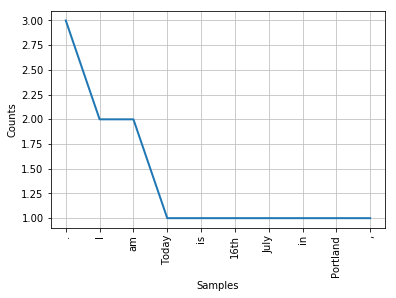

In [21]:
%matplotlib inline
plot_freq_dist(sample_words, num_words=10)

In [23]:
conference_words = get_word_tokens(conference_sentences)

Word tokens: ['Open', 'source', 'is', 'at', 'the', 'core', 'of', 'the', 'software', 'development', '.', 'But', 'today', ',', 'you', 'have', 'to', 'go', 'deeper', '.', 'You', 'need', 'to', 'know', 'how', 'to', 'implement', 'new', 'technologies', 'like', 'Kubernetes', 'and', 'TensorFlow', '.', 'You', 'need', 'to', 'work', 'in', 'a', 'cloud', 'environment', 'that', 'is', "n't", 'always', 'open', 'source-friendly', '.', 'To', 'know', 'how', 'machine', 'learning', 'can', 'make', 'or', 'break', 'your', 'code', '.', 'Whether', 'you', "'re", 'looking', 'to', 'understand', 'where', 'software', 'development', 'is', 'headed', ',', 'or', 'want', 'to', 'dive', 'into', 'the', 'key', 'technologies', 'that', 'you', 'need', 'to', 'build', 'resilient', ',', 'useful', ',', 'innovative', 'software', ',', 'the', "O'Reilly", 'Open', 'Source', 'Software', 'Conference', 'is', 'where', 'you', "'ll", 'find', 'the', 'answers', 'you', 'need', '.']


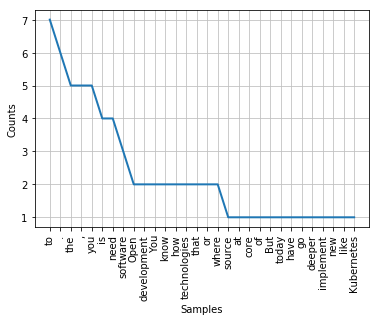

In [24]:
plot_freq_dist(conference_words, num_words=30)

In [25]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_clean_sentences(sentences, remove_digits=False):
    '''Cleaning sentences by removing special characters and optionally digits'''
    clean_sentences = []
    for sent in sentences:
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
        clean_text = re.sub(pattern, '', sent)
        clean_text = clean_text.lower()
        clean_sentences.append(clean_text)
    print('Clean sentences:', clean_sentences)
    return clean_sentences

def filter_stopwords(words):
    '''Removing stopwords from given words'''
    filtered_words = [w for w in words if w not in stop_words]
    print('Filtered words:', filtered_words)
    return filtered_words

In [26]:
sample_sentences = get_clean_sentences(sample_sentences, remove_digits = True)
sample_words = get_word_tokens(sample_sentences)
sample_words = filter_stopwords(sample_words)

Clean sentences: ['today is th july', 'i am in portland oregon for oscon', 'currently i am attending a natural language processing tutorial']
Word tokens: ['today', 'is', 'th', 'july', 'i', 'am', 'in', 'portland', 'oregon', 'for', 'oscon', 'currently', 'i', 'am', 'attending', 'a', 'natural', 'language', 'processing', 'tutorial']
Filtered words: ['today', 'th', 'july', 'portland', 'oregon', 'oscon', 'currently', 'attending', 'natural', 'language', 'processing', 'tutorial']


In [27]:
conference_sentences = get_clean_sentences(conference_sentences)
conference_words = get_word_tokens(conference_sentences)
conference_words = filter_stopwords(conference_words)

Clean sentences: ['open source is at the core of the software development', 'but today you have to go deeper', 'you need to know how to implement new technologies like kubernetes and tensorflow', 'you need to work in a cloud environment that isnt always open sourcefriendly', 'to know how machine learning can make or break your code', 'whether youre looking to understand where software development is headed or want to dive into the key technologies that you need to build resilient useful innovative software the oreilly open source software conference is where youll find the answers you need']
Word tokens: ['open', 'source', 'is', 'at', 'the', 'core', 'of', 'the', 'software', 'development', 'but', 'today', 'you', 'have', 'to', 'go', 'deeper', 'you', 'need', 'to', 'know', 'how', 'to', 'implement', 'new', 'technologies', 'like', 'kubernetes', 'and', 'tensorflow', 'you', 'need', 'to', 'work', 'in', 'a', 'cloud', 'environment', 'that', 'isnt', 'always', 'open', 'sourcefriendly', 'to', 'know'

In [28]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    '''Get the part of speech (POS) tags for the words'''
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
    print(tags)
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [29]:
sample_tags = get_pos_tags(sample_words)

[[('today', 'NN')], [('th', 'NN')], [('july', 'NN')], [('portland', 'NN')], [('oregon', 'NN')], [('oscon', 'NN')], [('currently', 'RB')], [('attending', 'VBG')], [('natural', 'JJ')], [('language', 'NN')], [('processing', 'NN')], [('tutorial', 'NN')]]


In [30]:
conference_tags = get_pos_tags(conference_words)

[[('open', 'JJ')], [('source', 'NN')], [('core', 'NN')], [('software', 'NN')], [('development', 'NN')], [('today', 'NN')], [('go', 'VB')], [('deeper', 'NN')], [('need', 'NN')], [('know', 'VB')], [('implement', 'NN')], [('new', 'JJ')], [('technologies', 'NNS')], [('like', 'IN')], [('kubernetes', 'NNS')], [('tensorflow', 'NN')], [('need', 'NN')], [('work', 'NN')], [('cloud', 'NN')], [('environment', 'NN')], [('isnt', 'NN')], [('always', 'RB')], [('open', 'JJ')], [('sourcefriendly', 'RB')], [('know', 'VB')], [('machine', 'NN')], [('learning', 'VBG')], [('make', 'VB')], [('break', 'NN')], [('code', 'NN')], [('whether', 'IN')], [('youre', 'NN')], [('looking', 'VBG')], [('understand', 'NN')], [('software', 'NN')], [('development', 'NN')], [('headed', 'VBN')], [('want', 'NN')], [('dive', 'NN')], [('key', 'NN')], [('technologies', 'NNS')], [('need', 'NN')], [('build', 'NN')], [('resilient', 'NN')], [('useful', 'JJ')], [('innovative', 'JJ')], [('software', 'NN')], [('oreilly', 'RB')], [('open',

In [40]:
nltk.download('wordnet')

from nltk.corpus import wordnet

def get_wordnet_properties(words):
    '''Returns definition, synonyms and antonyms of words'''
    for word in words:
        synonyms = []
        antonyms = []
#         hyponyms = []
#         hypernyms = []
        definitions = []
        for syn in wordnet.synsets(word):
            for lm in syn.lemmas():
                synonyms.append(lm.name())
                if lm.antonyms(): 
                    antonyms.append(lm.antonyms()[0].name())
#             hyponyms.append(syn.hyponyms())
#             hypernyms.append(syn.hypernyms())
#             definitions.append(syn.definition())
            
        print(word)
        print('Synonyms:', synonyms, '\nAntonyms:', antonyms, '\n')
#         print('Definition:', definitions, '\n')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
joey_dialogue = ['they', 'are', 'warm', 'nice', 'people', 'with', 'big', 'hearts']
get_wordnet_properties(joey_dialogue)

they
Synonyms: [] 
Antonyms: [] 

are
Synonyms: ['are', 'ar', 'be', 'be', 'be', 'exist', 'be', 'be', 'equal', 'be', 'constitute', 'represent', 'make_up', 'comprise', 'be', 'be', 'follow', 'embody', 'be', 'personify', 'be', 'be', 'live', 'be', 'cost', 'be'] 
Antonyms: ['differ'] 

warm
Synonyms: ['warm', 'warm_up', 'warm', 'warm', 'warm', 'warm', 'affectionate', 'fond', 'lovesome', 'tender', 'warm', 'strong', 'warm', 'quick', 'warm', 'ardent', 'warm', 'warm', 'warm', 'warm', 'warmly', 'warm'] 
Antonyms: ['cool', 'cool', 'cool'] 

nice
Synonyms: ['Nice', 'nice', 'decent', 'nice', 'nice', 'skillful', 'dainty', 'nice', 'overnice', 'prissy', 'squeamish', 'courteous', 'gracious', 'nice'] 
Antonyms: ['nasty'] 

people
Synonyms: ['people', 'citizenry', 'people', 'people', 'multitude', 'masses', 'mass', 'hoi_polloi', 'people', 'the_great_unwashed', 'people', 'people'] 
Antonyms: [] 

with
Synonyms: [] 
Antonyms: [] 

big
Synonyms: ['large', 'big', 'big', 'bad', 'big', 'big', 'big', 'large', 'pr

In [45]:
from nltk.wsd import lesk
sent = ['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.']
print(lesk(sent, 'bank', 'n'))

Synset('savings_bank.n.02')


In [47]:
sent = ['I', 'was', 'waiting', 'AT', 'the', 'BLOOD', 'bank', '.']
print(lesk(sent, 'bank', 'n'))

Synset('savings_bank.n.02')


In [48]:
from nltk.stem import PorterStemmer

def get_stems(words):
    '''Reduce the words to their base word (stem) by cutting off the ends'''
    ps = PorterStemmer()
    stems = []
    for word in words:
        stems.append(ps.stem(word))
    print(stems)
    return stems

In [49]:
sample_stems = get_stems(sample_words)

['today', 'th', 'juli', 'portland', 'oregon', 'oscon', 'current', 'attend', 'natur', 'languag', 'process', 'tutori']


In [50]:
conference_stems = get_stems(conference_words)

['open', 'sourc', 'core', 'softwar', 'develop', 'today', 'go', 'deeper', 'need', 'know', 'implement', 'new', 'technolog', 'like', 'kubernet', 'tensorflow', 'need', 'work', 'cloud', 'environ', 'isnt', 'alway', 'open', 'sourcefriendli', 'know', 'machin', 'learn', 'make', 'break', 'code', 'whether', 'your', 'look', 'understand', 'softwar', 'develop', 'head', 'want', 'dive', 'key', 'technolog', 'need', 'build', 'resili', 'use', 'innov', 'softwar', 'oreilli', 'open', 'sourc', 'softwar', 'confer', 'youll', 'find', 'answer', 'need']


In [51]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_lemma(word_tags):
    '''Reduce the words to their base word (lemma) by using a lexicon'''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, # Mapping NLTK POS tags to WordNet POS tags
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    print(lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
sample_lemma = get_lemma(sample_tags)

['today', 'th', 'july', 'portland', 'oregon', 'oscon', 'currently', 'attend', 'natural', 'language', 'processing', 'tutorial']
